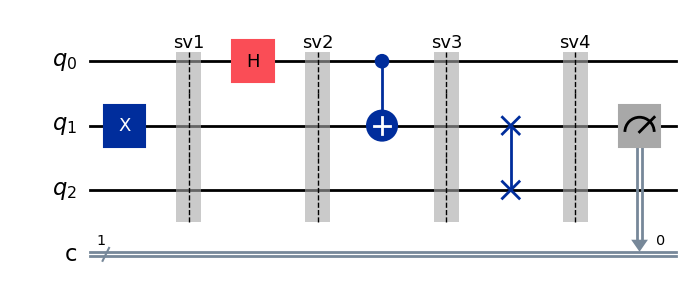

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

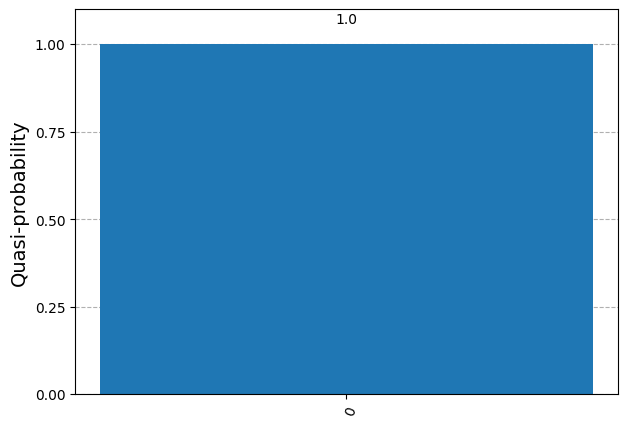

In [24]:
"""quantum_circuit1.ipynb"""

# Cell 01

from IPython.display import display
from qis101_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

qc = QuantumCircuit(3,1)
qc.x(1)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.cx(0, 1)
qc.save_statevector("sv3")
qc.swap(1,2)
qc.save_statevector("sv4")
qc.measure(1, 0)

# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend, optimization_level=1)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))


counts = result.get_counts(qc)
display(plot_distribution(counts))

In [ ]:
# Cell 02 - In this cell, in your own words, add text that:

# 1.) Explains the results shown in Statevector 4 above

# Let |q_2q_1q_0> be the standard form of the ket. The circuit has, in order, X, Hadamard, CNOT, and CSWAP gates. Each will multiply via a matrix a column vector representing the circuit.

# Starting with SV0 [1 0 0 0 0 0 0 0] corresponding to |000> ket, SV0 [1 0 0 0 0 0 0 0 ] under the Xgate becomes [0 0 1 0 0 0 0 0] since |000> ket becomes |010> and picks off position 2 in the statevector. 

# SV1 [0 0 1 0 0 0 0 0] becomes Statevector2 after the Haramard matrix is multiplied by sub-vector [1 0]==q_0. Here two kets are produced |010> and |011> relatigng to position 2 and 3 in the statevector, additionally these are 1/sqrt(2) due to the Hadamard gate.

# SV2 becomes SV3 after applying the CNOT gate where q_0 is the control and q_1 is the target. Thus |010> is fixed and |011> becomes |001> related to position 1 in the statevector. 

# Therefore, SV3 = 1/sqrt(2)[ 0 1 1 0 0 0 0 0]  

# Finally, we swap q_1 and q_2 in the kets from before, q_0 is fixed. Thus |010> becomes |100> and |001> is fixed since this swap does not effect swapping two 0's.

# Thus, the SV4 is 1/sqrt(2)[0 1 0 0 1 0 0 0]

# 2.) Explains why is there a 100% chance of measuring only a value of 0 for a single classical bit

# Since the final statevector refers to the |001> and |100> kets, a superpositon in the q-sphere, the probability of measuring q1 to be a 0 is 100%. 